In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.stats.outliers_influence import OLSInfluence

np.random.seed(0)


In [2]:
PATH = "lab/data/"
df_raw = pd.read_csv(f'{PATH}Auto.csv')

In [4]:
df_raw.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [6]:
# horsepower has some missing ('?') values
bad_rows = []
for index, row in df_raw.iterrows():
    if row['horsepower'] == "?":
        bad_rows.append(index)
df_raw = df_raw.drop(bad_rows)
print(f"dropped: {len(bad_rows)}")

dropped: 0


In [7]:
df = df_raw.astype({"origin": 'category', "horsepower": 'int'})
df.head(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
def get_lin_reg_model(model_formula, df_in, print_MSE=False, return_MSE=False):
    """
    Function returns the summary for fitted linear model.

    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """

    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df_in)) < 0.8
    train = df_in[mask]
    valid = df_in[~mask]

    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = sm.OLS(y_train, X_train)
    fitted_model = model.fit()
    y_train_pred = fitted_model.predict(X_train)
    train_MSE = metrics.mean_squared_error(y_train, y_train_pred)
    y_valid_pred = fitted_model.predict(X_valid)
    test_MSE = metrics.mean_squared_error(y_valid, y_valid_pred)

    if print_MSE is True:
        # Show MSE for training set
        print(f'{train_MSE=}')

        # Show MSE for validation set
        print(f'{test_MSE=}\n')

    # Return fitted model
    if return_MSE is True:
        return fitted_model, train_MSE, test_MSE
    else:
        return fitted_model

### a) Use statsmodels library for linear regression with mpg as the response and horsepower as the feature. Be prepared to explain parameters returned by summary() method that we have discussed, in particular: confidence intervals, p-values, T-statistic, F-statistic and R-squared.

In [9]:
mpg_horsepower_model = get_lin_reg_model("mpg ~ horsepower", df, print_MSE=True)
mpg_horsepower_model.summary()

train_MSE=24.288775716259412
test_MSE=23.06732783294265



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     501.0
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.71e-67
Time:                        14:42:00   Log-Likelihood:                -964.46
No. Observations:                 320   AIC:                             1933.
Df Residuals:                     318   BIC:                             1940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.9112      0.816     50.108      0.000      39.305      42.518
horsepower    -0.1668      0.007    -22.382      0.000      -0.182      -0.152
==============================================================================
Omnibus:                       11.590   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.908
Skew:                           0.427   Prob(JB):                      0.00260
Kurtosis:                       3.405   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

confidence interval -- A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter.

T-statistic -- $T = \frac{\hat \Theta_i -\Theta_i}{\hat \sigma}$ under $H_0$ this random variable has t-distribution.

p-value -- having $T_{observed} = \frac{\hat \Theta_i}{\hat \sigma}$, we assume that $H_0$ is true and find p-value = $Pr[T \gt T_{observed} | H_0]$. Based on p-value and significance level we may reject $H_0$.

F-statistic -- $F = \frac{(TSS - RSS)/p}{RSS/(n-p-1)}$, under $H_0$ (all $\Theta$s are equal to 0) $F$ has f-distribution. If $F$ is close to $1$ we cannot reject $H_0$, if $F$ >> 1 we can reject $H_0$.

R-squared =  $1 - \frac{RSS}{TSS}$ -- shows how much of data variance can be explained.

### b) Create a scatterplot matrix which includes all of the variables in the data set. You can use pandas.plotting.scatter_matrix(...). Compute the matrix of correlations between the variables, you may use corr() function for pandas dataframe.

/tmp/ipykernel_25087/3883448475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration      year  
mpg               0.423329  0.580541  
cylinders        -0.504683 -0.345647  
displacement     -0.543800 -0.369855  
horsepower       -0.689196 -0.416361  
weight           -0.416839 -0.309120  
acceleration      1.000000  0.290316  
year              0.290316  1.000000  


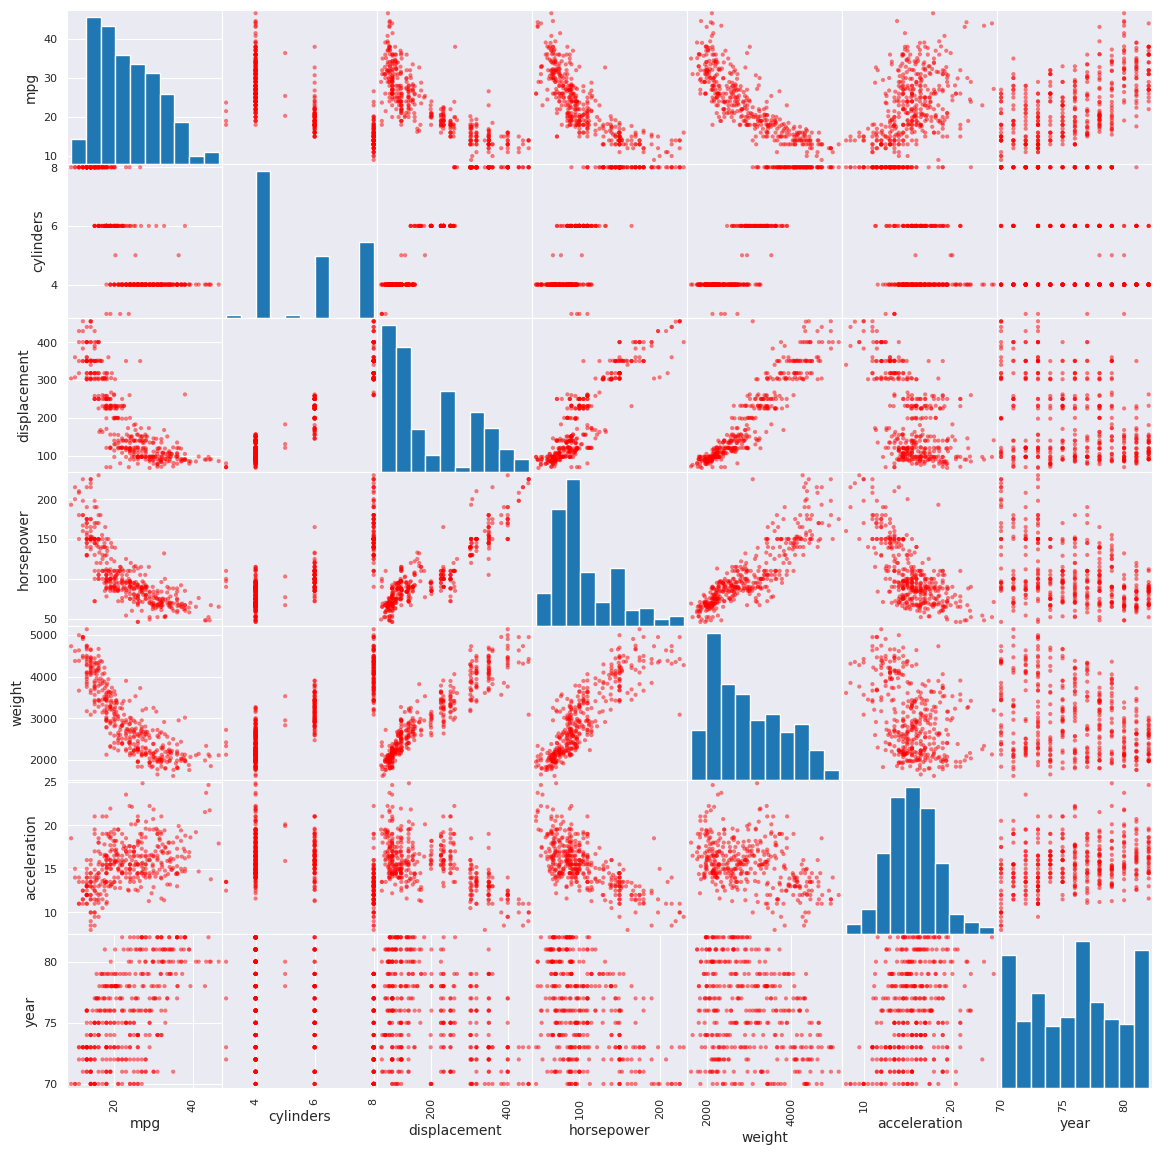

In [10]:
print(df.corr())
axis = pd.plotting.scatter_matrix(df, color="red", figsize=(14, 14))

### c) Perform a linear regression with mpg as the response and all other variables (except name) as the features. Try defining different models with patsy library, use symbols +, *, : and different transformations of the variables like for example I(np.log(X)) or I(np.sqrt(X)). For which model you get the best generalization error?

In [11]:
models = [
    'mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin + year',
    #
    # 'mpg ~ cylinders',
    # 'mpg ~ displacement',
    # 'mpg ~ horsepower',
    # 'mpg ~ weight',
    # 'mpg ~ acceleration',
    # 'mpg ~ year',
    #
    # 'mpg ~ I(np.log(displacement))',
    # 'mpg ~ I(np.log(horsepower))',
    # 'mpg ~ I(np.log(weight))',
    # 'mpg ~ I(np.log(acceleration))',
    #
    # 'mpg ~ I(np.sqrt(displacement))',
    # 'mpg ~ I(np.sqrt(horsepower))',
    # 'mpg ~ I(np.sqrt(weight))',
    # 'mpg ~ I(np.sqrt(acceleration))',
    #
    'mpg ~ acceleration + cylinders + year',
    'mpg ~ acceleration + horsepower + weight',
    #
    'mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + I(np.log(weight)) + acceleration + origin + year',
    'mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + I(np.log(weight)) + acceleration + year',
    'mpg ~ I(np.log(displacement)) + I(np.log(horsepower)) + I(np.log(weight)) + acceleration',
    #
    'mpg ~ cylinders + I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + acceleration + year',
    'mpg ~ I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + acceleration*year*cylinders',

]

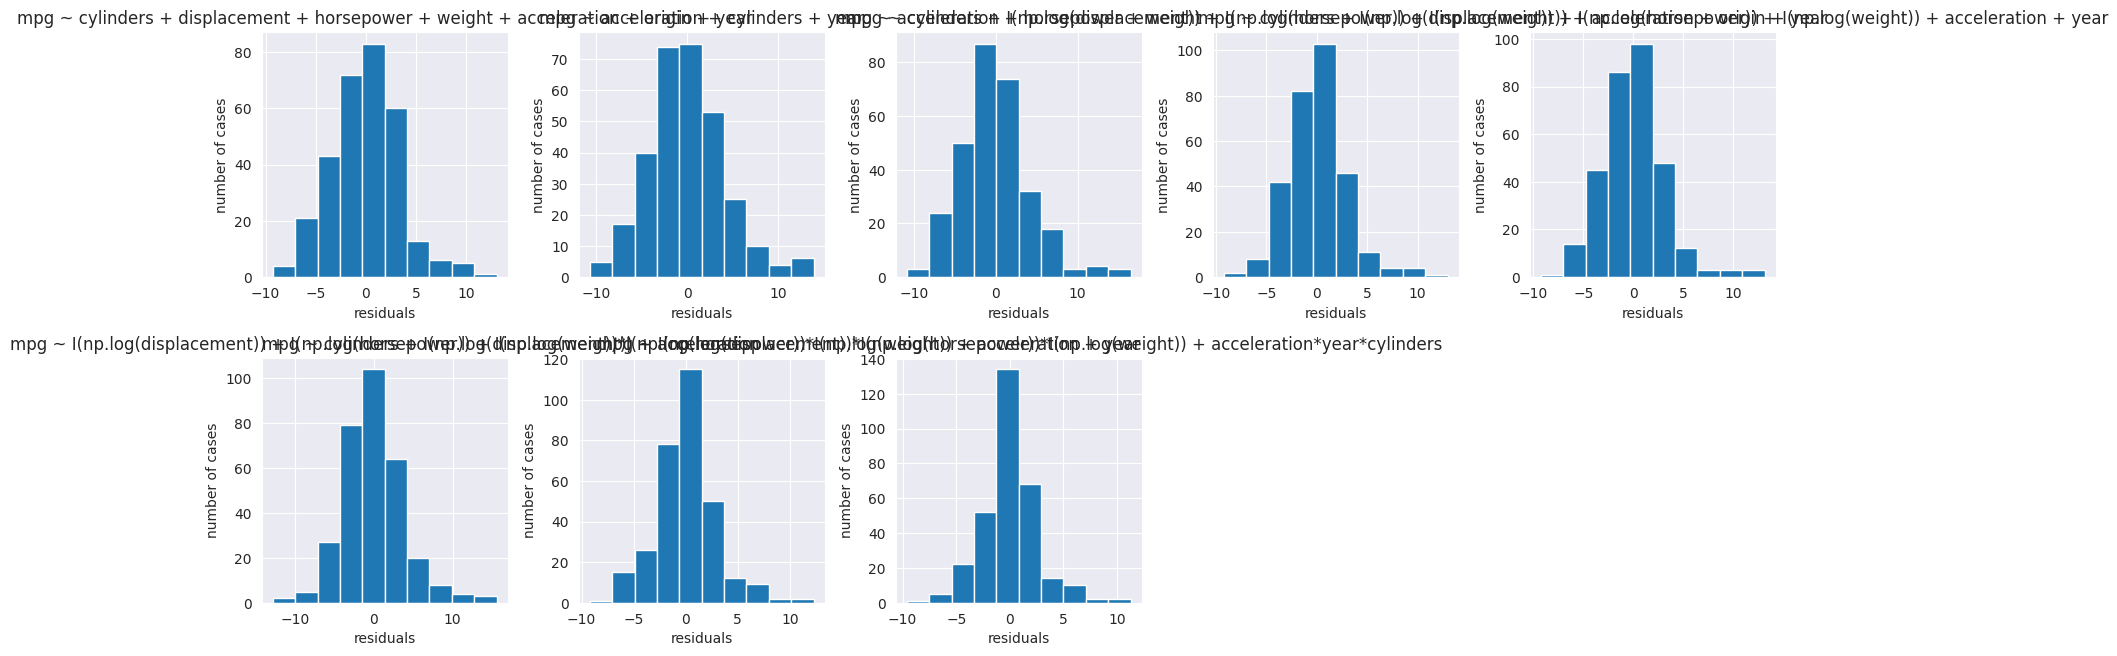

In [12]:
fig = plt.figure(figsize=(16, 16))
i = 1
models_comp = {}
for model in models:
    fig.add_subplot(5, 5, i)
    reg_model, train_MSE, test_MSE = get_lin_reg_model(model, df, print_MSE=False, return_MSE=True)
    models_comp[model] = {"train_MSE": train_MSE, "test_MSE": test_MSE, "R2": reg_model.rsquared}
    ax = reg_model.resid.hist()
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(models[i - 1])
    plt.tight_layout()
    i = i + 1

In [13]:
sorted_model_comp_R2 = sorted(models_comp.items(), key=lambda item: item[1]["R2"], reverse=True)
pprint(sorted_model_comp_R2)

[('mpg ~ I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + '
  'acceleration*year*cylinders',
  {'R2': 0.8835995487874038,
   'test_MSE': 10.086004955745967,
   'train_MSE': 6.850898629123652}),
 ('mpg ~ cylinders + '
  'I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + '
  'acceleration + year',
  {'R2': 0.8626268806677072,
   'test_MSE': 6.330359117107195,
   'train_MSE': 8.4434938160962}),
 ('mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + '
  'I(np.log(weight)) + acceleration + origin + year',
  {'R2': 0.8599479105977123,
   'test_MSE': 11.007738943347741,
   'train_MSE': 8.698153269283095}),
 ('mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + '
  'I(np.log(weight)) + acceleration + year',
  {'R2': 0.8460805984141457,
   'test_MSE': 9.944574767905772,
   'train_MSE': 9.349342883219752}),
 ('mpg ~ cylinders + displacement + horsepower + weight + acceleration + '
  'origin + year',
  {'R2': 0.8226473687844503,
   

### d) Try to look for outliers and remove them from the data (see e.g.: residual plot, Z-Score). What are high leverage points? How can you detect them (for example see http://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html)? Retrain your models on cleansed data and compare the results.

In [14]:
for col_name in ["displacement", "horsepower", "weight", "acceleration"]:
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    rem_mask = df[(df[col_name] < low) | (df[col_name] > hi)].index
    if len(rem_mask) > 0:
        print(rem_mask)
    df.drop(rem_mask, inplace = True)
    # print(df.head())


Int64Index([6, 7, 8, 13, 25, 27, 67, 94, 95, 116], dtype='int64')
Int64Index([9, 11, 59, 195, 196, 299, 300, 326, 393], dtype='int64')


373


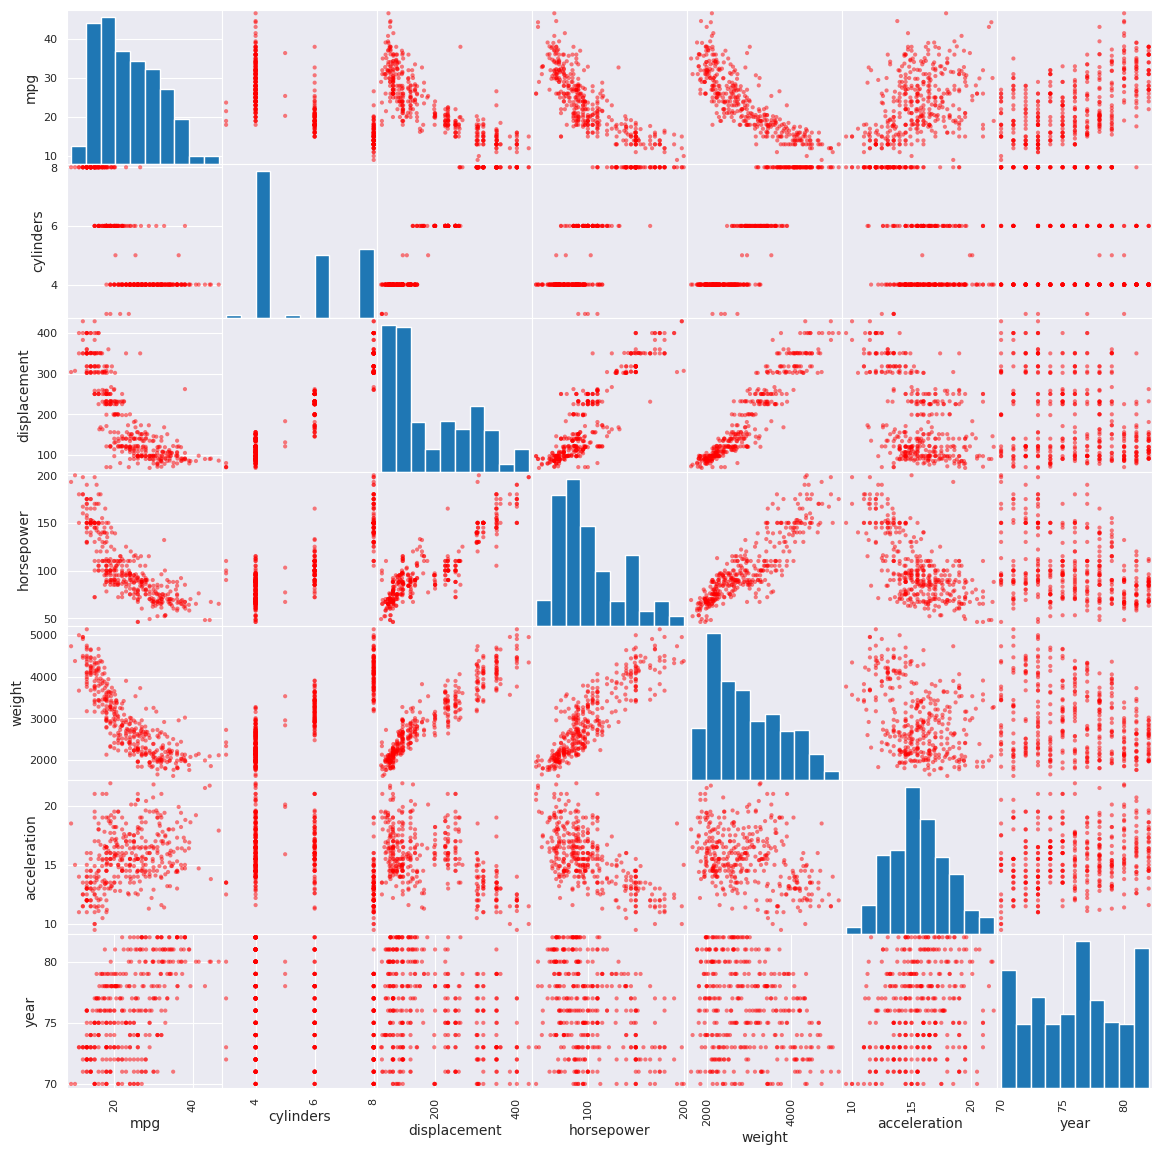

In [15]:
print(len(df))
axis = pd.plotting.scatter_matrix(df, color="red", figsize=(14, 14))

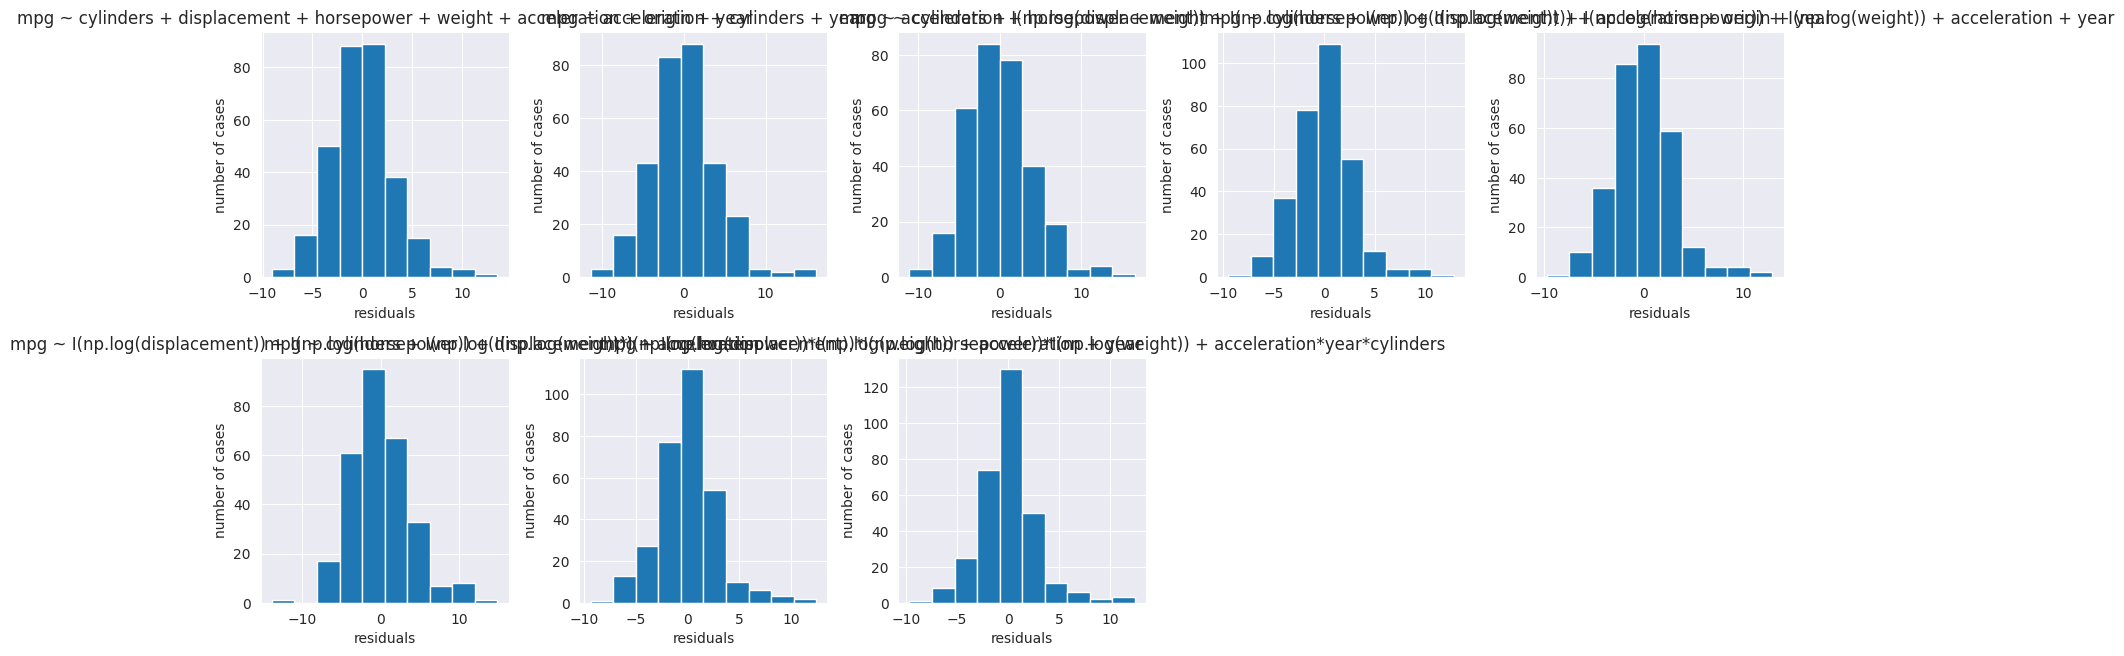

In [16]:
fig = plt.figure(figsize=(16, 16))
i = 1
models_comp = {}
for model in models:
    fig.add_subplot(5, 5, i)
    reg_model, train_MSE, test_MSE = get_lin_reg_model(model, df, print_MSE=False, return_MSE=True)
    models_comp[model] = {"train_MSE": train_MSE, "test_MSE": test_MSE, "R2": reg_model.rsquared}
    ax = reg_model.resid.hist()
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(models[i - 1])
    plt.tight_layout()
    i = i + 1

In [17]:
sorted_model_comp_R2 = sorted(models_comp.items(), key=lambda item: item[1]["R2"], reverse=True)
pprint(sorted_model_comp_R2)

[('mpg ~ I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + '
  'acceleration*year*cylinders',
  {'R2': 0.8685332721214585,
   'test_MSE': 5.6511472590677805,
   'train_MSE': 7.829558969176929}),
 ('mpg ~ cylinders + '
  'I(np.log(displacement))*I(np.log(horsepower))*I(np.log(weight)) + '
  'acceleration + year',
  {'R2': 0.8590055601548756,
   'test_MSE': 6.403818514755668,
   'train_MSE': 8.110533450342668}),
 ('mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + '
  'I(np.log(weight)) + acceleration + origin + year',
  {'R2': 0.8511508345907546,
   'test_MSE': 9.147099363300336,
   'train_MSE': 8.581339414276917}),
 ('mpg ~ cylinders + I(np.log(displacement)) + I(np.log(horsepower)) + '
  'I(np.log(weight)) + acceleration + year',
  {'R2': 0.8435518100630525,
   'test_MSE': 6.225289669489108,
   'train_MSE': 9.365449893403738}),
 ('mpg ~ cylinders + displacement + horsepower + weight + acceleration + '
  'origin + year',
  {'R2': 0.8270422968153567,
  